In [ ]:
#   NLP ASSIGNMENT  -|
#   -----------------|
#   Text Analysis and Topic Discovery  -|
#   ------------------------------------|


#   Introduction  -|
#   ---------------|
#   This text analysis and topic discovery assignment focuses on applying classical Natural Language Processing(NLP)
#   techniques to a small multi-domain corpus consisting of documents from climate change, sports, and data/technology.
#   The project workflow includes:
    - Preprocessing: Converting text to lowercase, removing punctuation and stopwords, and tokenizing into clean
                     word tokens.
    - TF-IDF Analysis: Extracting the top terms from each document to highlight their distinctive word usage patterns.
    - Word2Vec Embeddings: Training distributed word representations to capture semantic similarity between words,
                           and visualizing embeddings using PCA.
    - Topic Modeling (LDA): Discovering latent themes in the corpus by clustering words into interpretable topics
                            and assigning a dominant topic to each document.

The goal is to demonstrate how these fundamental NLP techniques can reveal important keywords, semantic neighborhoods, and hidden thematic structures in text data.

In [2]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Example corpus (30 docs across climate, sports, data/tech)
text_doc = [
    "Global warming accelerates as greenhouse gas emissions rise, impacting sea levels and weather extremes.",
    "Climate change reports highlight rapid ice melt, ocean heat content records, and more frequent heatwaves.",
    "Scientists analyze carbon footprints and propose data-driven policies to reduce emissions and protect biodiversity.",
    "Renewable energy adoption grows as nations invest in solar and wind to cut pollution and stabilize grids.",
    "Mitigation and adaptation strategies require data, analysis, and collaboration between governments and communities.",
    "Rising global temperatures contribute to prolonged droughts and agricultural challenges.",
    "Deforestation and land degradation worsen climate impacts and threaten ecosystems worldwide.",
    "International climate agreements aim to reduce carbon emissions and promote green technology.",
    "Melting glaciers threaten freshwater supplies and increase the risk of flooding.",
    "Environmental activists urge policymakers to prioritize sustainability and climate resilience.",
    "The football team delivered a stunning comeback to win the championship match in extra time.",
    "Cricket analytics show bowlers exploiting swing and seam on overcast days to restrict run rates.",
    "Basketball players improved offensive efficiency through better spacing, passing, and fast-break execution.",
    "Tennis athletes used video analysis and wearable data to optimize footwork, serve speed, and recovery.",
    "Fans celebrated the home club after a dramatic penalty shootout sealed the league title.",
    "The Olympic Games attract athletes from across the globe, showcasing sportsmanship and unity.",
    "Baseball pitchers adjusted their strategies using data to outsmart batters.",
    "Marathon runners focused on hydration strategies and pacing to maximize endurance.",
    "A controversial referee decision changed the outcome of the boxing championship.",
    "Sports scientists measured athlete performance using heart-rate monitors and GPS tracking.",
    "Data scientists cleaned messy datasets, engineered features, and built robust models for accurate predictions.",
    "Exploratory data analysis revealed patterns, seasonality, and outliers that informed business decisions.",
    "The machine learning pipeline automated training, validation, and deployment with reproducible experiments.",
    "Natural language processing extracted key phrases and topics to summarize customer reviews effectively.",
    "A/B testing and causal analysis measured uplift, while dashboards communicated insights to stakeholders.",
    "Artificial intelligence is transforming the healthcare industry by assisting in diagnosis and treatment planning.",
    "New smartphones are released with advanced camera technology and AI-powered features.",
    "Cybersecurity measures are critical to protect sensitive data from malicious attacks.",
    "Cloud computing platforms enable scalable solutions for big data analytics and storage.",
    "Robotics and automation increase efficiency in manufacturing and supply chain operations."
]


stop_words = set(stopwords.words('english'))

def tokenizing(txt):
    txt = txt.lower()
    txt = re.sub(r'[^a-z\s]', '', txt)  
    tokens = word_tokenize(txt)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

docs = [tokenizing(doc) for doc in text_doc]

print("Text after preprocessing\n:", docs)

Text after preprocessing
: [['global', 'warming', 'accelerates', 'greenhouse', 'gas', 'emissions', 'rise', 'impacting', 'sea', 'levels', 'weather', 'extremes'], ['climate', 'change', 'reports', 'highlight', 'rapid', 'ice', 'melt', 'ocean', 'heat', 'content', 'records', 'frequent', 'heatwaves'], ['scientists', 'analyze', 'carbon', 'footprints', 'propose', 'datadriven', 'policies', 'reduce', 'emissions', 'protect', 'biodiversity'], ['renewable', 'energy', 'adoption', 'grows', 'nations', 'invest', 'solar', 'wind', 'cut', 'pollution', 'stabilize', 'grids'], ['mitigation', 'adaptation', 'strategies', 'require', 'data', 'analysis', 'collaboration', 'governments', 'communities'], ['rising', 'global', 'temperatures', 'contribute', 'prolonged', 'droughts', 'agricultural', 'challenges'], ['deforestation', 'land', 'degradation', 'worsen', 'climate', 'impacts', 'threaten', 'ecosystems', 'worldwide'], ['international', 'climate', 'agreements', 'aim', 'reduce', 'carbon', 'emissions', 'promote', 'gre

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer()
result = vectorizer.fit_transform(text_doc)

# unique words
print("Features names:")
print(vectorizer.get_feature_names_out())

# unique words index
print("\nVocabulary mapping:")
print(vectorizer.vocabulary_)

# matrix
print(result)
print("\nMatrix:")
print(result.toarray())

print("\n", result.shape)


for i in range(result.shape[0]):
    row = result[i].toarray().ravel()
    top_indices = row.argsort()[-5:][::-1]
    # top 5
    top_words = [(vectorizer.get_feature_names_out()[j], row[j]) for j in top_indices if row[j] > 0]
    print(f"\nDocument {i}:")
    for word, score in top_words:
        print(f"   {word}: {score:.3f}")


Features names:
['accelerates' 'accurate' 'across' 'activists' 'adaptation' 'adjusted'
 'adoption' 'advanced' 'after' 'agreements' 'agricultural' 'ai' 'aim'
 'analysis' 'analytics' 'analyze' 'and' 'are' 'artificial' 'as'
 'assisting' 'athlete' 'athletes' 'attacks' 'attract' 'automated'
 'automation' 'baseball' 'basketball' 'batters' 'better' 'between' 'big'
 'biodiversity' 'bowlers' 'boxing' 'break' 'built' 'business' 'by'
 'camera' 'carbon' 'causal' 'celebrated' 'chain' 'challenges'
 'championship' 'change' 'changed' 'cleaned' 'climate' 'cloud' 'club'
 'collaboration' 'comeback' 'communicated' 'communities' 'computing'
 'content' 'contribute' 'controversial' 'cricket' 'critical' 'customer'
 'cut' 'cybersecurity' 'dashboards' 'data' 'datasets' 'days' 'decision'
 'decisions' 'deforestation' 'degradation' 'delivered' 'deployment'
 'diagnosis' 'dramatic' 'driven' 'droughts' 'ecosystems' 'effectively'
 'efficiency' 'emissions' 'enable' 'endurance' 'energy' 'engineered'
 'environmental' 'ex

Similar words to 'data': [('analysis', 0.7187355756759644), ('mitigation', 0.7105127573013306), ('wearable', 0.7057768702507019), ('require', 0.7050082087516785), ('exploratory', 0.7049092650413513)]
Similar words to 'analysis': [('exploratory', 0.8255478143692017), ('ab', 0.8185932040214539), ('testing', 0.8077534437179565), ('wearable', 0.8074007630348206), ('video', 0.8061183094978333)]


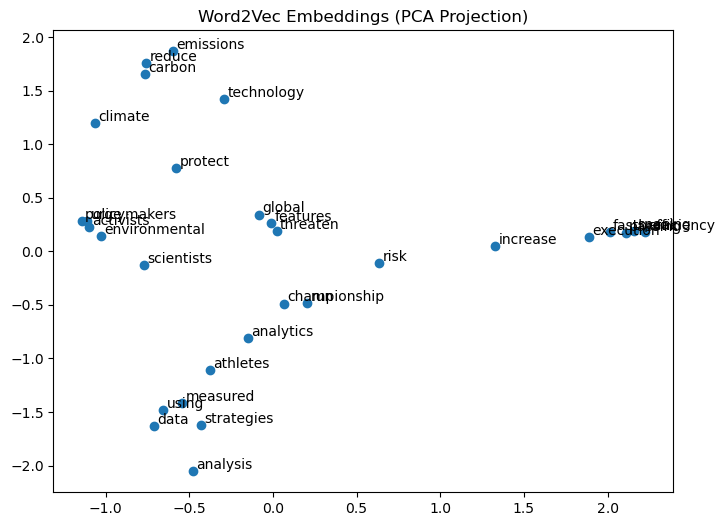

In [5]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Train Word2Vec using skip-gram
model = Word2Vec(sentences=docs,
                     vector_size=100,
                     window=5,
                     min_count=1,
                     sg=1,          # skip-gram
                     epochs=300)

# Find similar words
print("Similar words to 'data':", model.wv.most_similar("data", topn=5))
print("Similar words to 'analysis':", model.wv.most_similar("analysis", topn=5))

# Visualize embeddings (PCA)
words = list(model.wv.key_to_index.keys())[:30]
res = model.wv[words]
pca = PCA(n_components=2)
result2 = pca.fit_transform(res)

plt.figure(figsize=(8,6))
plt.scatter(result2[:,0], result2[:,1])
for i, word in enumerate(words):
    plt.text(result2[i,0]+0.02, result2[i,1]+0.02, word)
plt.title("Word2Vec Embeddings (PCA Projection)")
plt.show()


In [6]:
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis


txt = [[word for word in doc.lower().split() if word not in stop_words] 
       for doc in text_doc]


# Dictionary & Bag of Words
# ----------------
dictionary = corpora.Dictionary(txt)               # map of ids to words
corpus = [dictionary.doc2bow(text) for text in txt] # list of (word_id, count)

# Train LDA Model
# ----------------
lda_model = models.LdaModel(corpus,
                            num_topics=3,
                            id2word=dictionary,
                            passes=15,
                            random_state=42)

# Print Topics
# ----------------
for idx, topic in lda_model.print_topics(-1, num_words=5):
    print(f"Topic {idx+1}: {topic}")

# Assign most relevant topic to each document
for i, row in enumerate(lda_model[corpus]):
    row = sorted(row, key=lambda x: x[1], reverse=True)
    doc_topic = row[0][0]   # topic id with highest probability
    print(f"Document {i+1} is most related to Topic {doc_topic+1} (prob={row[0][1]:.3f})")

# Visualization with pyLDAvis
# ----------------
pyLDAvis.enable_notebook()
lda_visual = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visual)


Topic 1: 0.020*"climate" + 0.020*"data" + 0.015*"analysis" + 0.011*"athletes" + 0.006*"stabilize"
Topic 2: 0.015*"strategies" + 0.015*"data" + 0.009*"increase" + 0.009*"analytics" + 0.009*"efficiency"
Topic 3: 0.013*"emissions" + 0.013*"scientists" + 0.013*"global" + 0.008*"reduce" + 0.008*"carbon"
Document 1 is most related to Topic 3 (prob=0.948)
Document 2 is most related to Topic 1 (prob=0.952)
Document 3 is most related to Topic 3 (prob=0.943)
Document 4 is most related to Topic 1 (prob=0.948)
Document 5 is most related to Topic 2 (prob=0.933)
Document 6 is most related to Topic 3 (prob=0.925)
Document 7 is most related to Topic 1 (prob=0.932)
Document 8 is most related to Topic 1 (prob=0.936)
Document 9 is most related to Topic 3 (prob=0.924)
Document 10 is most related to Topic 1 (prob=0.925)
Document 11 is most related to Topic 1 (prob=0.939)
Document 12 is most related to Topic 3 (prob=0.948)
Document 13 is most related to Topic 3 (prob=0.938)
Document 14 is most related to To

#   Conclusion  -|
#   -------------|
#   The assignment successfully implemented a complete pipeline for text analytics, from data preprocessing through TF-IDF keyword extraction, Word2Vec semantic modeling, and LDA topic discovery.
#   Key Findings:
    - TF-IDF effectively highlighted distinctive words, such as emissions and heatwaves for climate texts, match and championship for sports, and models and analysis for data/tech.
    - Word2Vec embeddings grouped semantically related terms (e.g., data ↔ analysis, match ↔ championship), confirming the model’s ability to capture contextual meaning.
    - LDA revealed coherent topics representing climate, sports, and data workflows, with some overlap due to the small dataset size.